In [0]:
__author__ = "Phillip Lakaschus"
__email__ = "lakaschus@th.physik.uni-frankfurt.de"

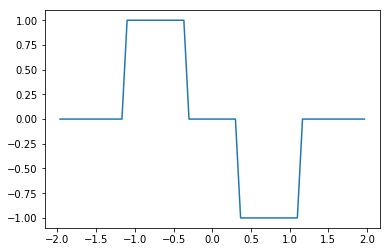

0.17011427879333496


<Figure size 480x600 with 0 Axes>

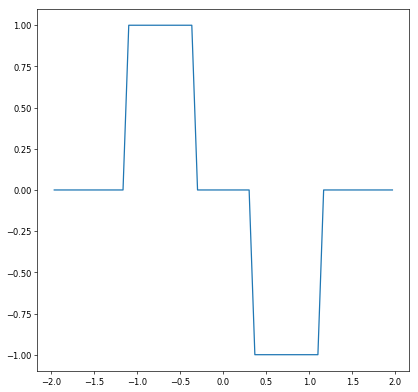

0.0


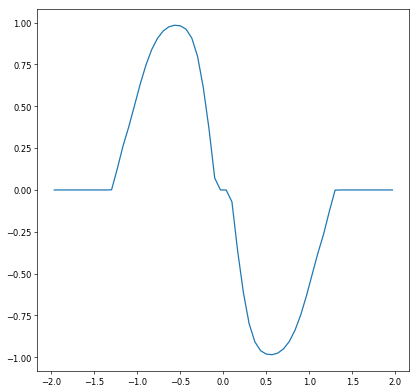

0.11313131313131312


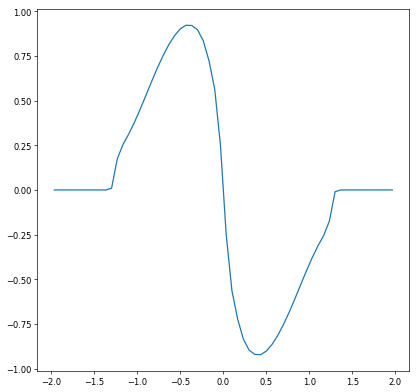

0.22626262626262625


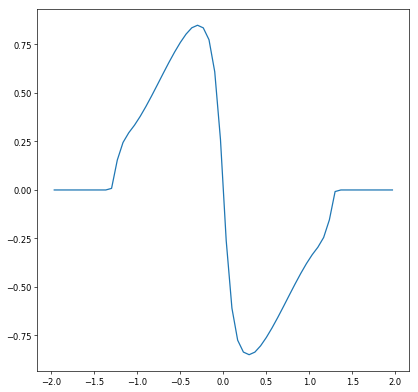

0.33939393939393936


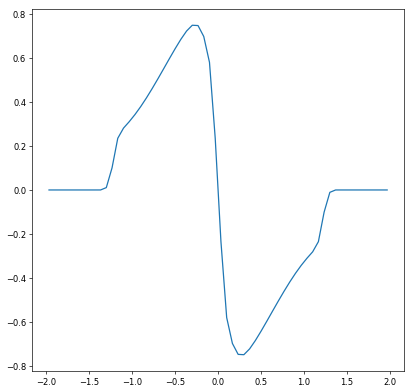

0.4525252525252525


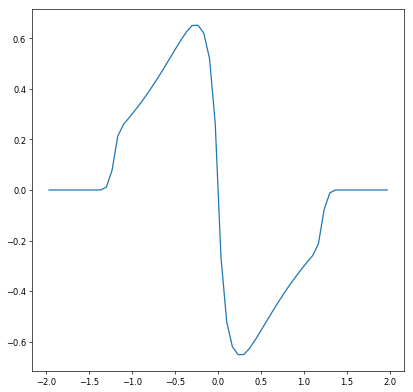

0.5656565656565656


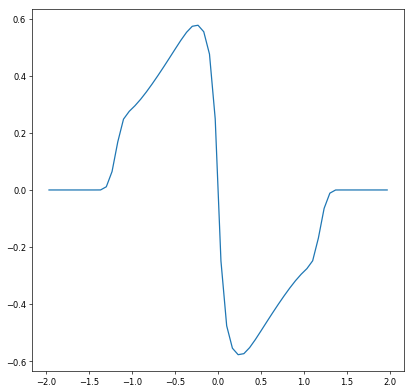

0.6787878787878787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [0]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

%matplotlib inline

N = 60
xmax = 1
x = np.linspace(-2., 2., N+1)
N_t = 100
t = np.linspace(0, 0.7, N_t)

xc = 0.5*np.array(x[:-1]+x[1:])

dx = x[1] - x[0]

u0 = np.zeros(N)
for i in range(N):
  if xc[i] < -1/np.sqrt(2) + 0.4 and xc[i] > -1/np.sqrt(2) - 0.4:
    u0[i] = 1
  if xc[i] < 1/np.sqrt(2) + 0.4 and xc[i] > 1/np.sqrt(2) - 0.4:
    u0[i] = -1

plt.plot(xc, u0)
plt.show()

start = time.time()  

def minmod(r):
  minmod = (r > 0).astype(int)
  minmod2 = (r < 1).astype(int)
  minmod3 = (r >= 1).astype(int)
  return minmod*minmod2*r + minmod3*np.ones(len(r)) 

def minmod2(a, b):
  minmod = (np.abs(a) < np.abs(b)).astype(int)
  minmod2 = (np.abs(b) < np.abs(a)).astype(int)
  return 1/2*(np.sign(a) + np.sign(b))*(minmod*np.abs(a) + minmod2*np.abs(b))

def minmod3(a, b):                                                               
    minmod = (a*b > 0).astype(int)                                              
    minmod2 = (a < 0).astype(int)*np.maximum(a, b)                              
    minmod3 = (a >= 0).astype(int)*np.minimum(a, b)                             
    return minmod*(minmod2*minmod3) 
  
def dudt(t, u):
  u = np.append(0, np.append(u, 0))
  
  limiter = minmod2((u[1:-1] - u[:-2])/dx, (u[2:] - u[1:-1])/dx)
  uLForw = u[0]
  uLCent = u[1:-1] + dx/2*limiter
  uL = np.append(uLForw, uLCent)
  
  uRBack = u[-1]
  uRCent = u[1:-1] - dx/2*limiter
  uR = np.append(uRCent, uRBack)

  FL = uL**2
  FR = uR**2
 
  FL_d = 2*uL
  FR_d = 2*uR
  
  prop = (np.abs(FL_d) >= np.abs(FR_d)).astype(int)*np.abs(FL_d) + (np.abs(FL_d) < np.abs(FR_d)).astype(int)*np.abs(FR_d)
    
  fu_interface = (FL + FR)/2 - prop/2*(uR - uL)
  
  eps = 0.1

  Q1 = eps*np.heaviside(abs(u[1:-1]) - 0.25, 1)*(u[2:] - u[1:-1])/dx
  Q2 = eps*np.heaviside(abs(u[2:]) - 0.25, 1)*(u[2:] - u[1:-1])/dx
  Q3 = eps*np.heaviside(abs(u[:-2]) - 0.25, 1)*(u[1:-1] - u[:-2])/dx
  Q4 = eps*np.heaviside(abs(u[1:-1]) - 0.25, 1)*(u[1:-1] - u[:-2])/dx
  
  Pp = 1/2*(Q1 + Q2)
  Pm = 1/2*(Q3 + Q4)

  dudt =  (fu_interface[:-1] - fu_interface[1:])/dx + (Pp - Pm)/dx
  return dudt

def solution(u0):
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t)
    return sol.y

sol = solution(u0)

print(time.time()-start)

plt.figure(figsize=(8, 10), dpi= 60, facecolor='w', edgecolor='k')

for i in range(0, N_t, int(N_t/6)):
    plt.figure(figsize=(8, 8), dpi= 60, facecolor='w', edgecolor='k')
    plt.plot(xc, sol[:,i])
    plt.show()
    print(t[i])
    
print(sol[-1])